<a href="https://colab.research.google.com/github/HosamOuda/Detecting-Pima-Indians-Diabetes/blob/main/Detecting_Pima_Indians_Diabetes_Database_%E2%80%93_Python_Machine_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


> Welcome to the project! You will find tips in quoted sections like this to help organize your approach to your investigation.

# Project: Investigate a Pima Indians Diabetes Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#pre">Prediction analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> Diabetes is one of the deadliest diseases in the world. It is not only a disease but also creator of different kinds of diseases like heart attack, blindness etc. The normal identifying process is that patients need to visit a diagnostic center, consult their doctor, and sit tight for a day or more to get their reports. So, the objective of this project is to identify whether the patient has diabetes or not based on diagnostic measurements.. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.
>
> The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

> About Dataset:

>> Pregnancies: No. of times pregnant

>> Glucose: Plasma Glucose Concentration (mg/dl)

>> Blood Pressure: Diastolic Blood Pressure(mmHg)

>> Skin Thickness:A value used to estimate body fat. Normal Triceps SkinFold Thickness in women is 23mm. Higher thickness leads to obesity and chances of diabetes increases.

>> Insulin: 2-Hour Serum Insulin (mu U/ml)

>> BMI: Body Mass Index (weight in kg/ height in m2)

>> Diabetes Pedigree Function: It provides information about diabetes history in relatives and genetic relationship of those relatives with patients. Higher Pedigree Function means patient is more likely to have diabetes.

>> Age:Age (years)

>> Outcome: Class Variable (0 or 1) where ‘0’ denotes patient is not having diabetes and ‘1’ denotes patient having diabetes.

In [ ]:
# Use this cell to set up import statements for all of the packages that you plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 
import numpy as np
from numpy import linalg as LA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [ ]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
#ad_data = pd.read_csv('/content/drive/MyDrive/diabetes.csv') # uncomment this for drive mount to work
ad_data = pd.read_csv('/content/diabetes.csv')
ad_data
describtion = ad_data.describe()
ad_data_height=ad_data.shape[0]
ad_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

**Ezz**

### **Removing Outliers**
based on IQR Score


In [ ]:
Q1 = ad_data.quantile(0.25)
median =  ad_data.quantile(0.50)
Q3 = ad_data.quantile(0.75)
IQR = Q3 - Q1
Lower_limit= Q1-(1.5*IQR)
Upper_limit= Q3+(1.5*IQR)
print('Pregnancies ',Q1.Pregnancies,median.Pregnancies,Q3.Pregnancies,IQR.Pregnancies)
print('Glucose ',Q1.Glucose,median.Glucose,Q3.Glucose,IQR.Glucose)
print('BloodPressure ',Q1.BloodPressure,median.BloodPressure,Q3.BloodPressure,IQR.BloodPressure)
print('SkinThickness ',Q1.SkinThickness,median.SkinThickness,Q3.SkinThickness,IQR.SkinThickness)
print('BMI ',Q1.BMI,median.BMI,Q3.BMI,IQR.BMI)
print('Diabfn ',Q1.DiabetesPedigreeFunction,median.DiabetesPedigreeFunction,Q3.DiabetesPedigreeFunction,IQR.DiabetesPedigreeFunction)
print('Age ',Q1.Age,median.Age,Q3.Age,IQR.Age)
print('Insulin ',Q1.Insulin,median.Insulin,Q3.Insulin,IQR.Insulin)

#Insfilter = ad_data[ad_data.Insulin > 0]
#nsfilter = Insfilter[Insfilter.Insulin < Upper_limit.Insulin]

#print(Insfilter.shape)

pregfilter= ad_data[ad_data.Pregnancies > Lower_limit.Pregnancies  ]
pregfilter= pregfilter[ pregfilter.Pregnancies < Upper_limit.Pregnancies ]

print(pregfilter.shape)

glfilter = pregfilter[pregfilter.Glucose > Lower_limit.Glucose]
glfilter = glfilter[glfilter.Glucose < Upper_limit.Glucose]

print(glfilter.shape)

BPfilter = glfilter[glfilter.BloodPressure > Lower_limit.BloodPressure]
BPfilter = BPfilter[BPfilter.BloodPressure < Upper_limit.BloodPressure]

print(BPfilter.shape)

STfilter = BPfilter[BPfilter.SkinThickness > Lower_limit.SkinThickness]
STfilter = STfilter[STfilter.SkinThickness < Upper_limit.SkinThickness]

print(STfilter.shape)

BMIfilter = STfilter[STfilter.BMI > Lower_limit.BMI]
BMIfilter = BMIfilter[BMIfilter.BMI < Upper_limit.BMI]

print(BMIfilter.shape)

Insfilter = BMIfilter


Insfilter = BMIfilter[BMIfilter.Insulin > 0]
Insfilter = Insfilter[Insfilter.Insulin < Upper_limit.Insulin]

print(Insfilter.shape)

#Insfilter = ad_data

Pregnancies  1.0 3.0 6.0 5.0
Glucose  99.0 117.0 140.25 41.25
BloodPressure  62.0 72.0 80.0 18.0
SkinThickness  0.0 23.0 32.0 32.0
BMI  27.3 32.0 36.6 9.3
Diabfn  0.24375 0.3725 0.62625 0.38249999999999995
Age  24.0 29.0 41.0 17.0
Insulin  0.0 30.5 127.25 127.25
(764, 9)
(759, 9)
(714, 9)
(713, 9)
(704, 9)
(347, 9)


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

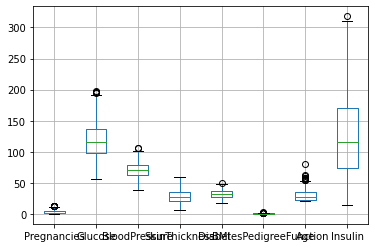

In [ ]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
Insfilter.boxplot(column=['Pregnancies', 'Glucose', 'BloodPressure',"SkinThickness","BMI","DiabetesPedigreeFunction","Age","Insulin"])



### Research Question 2  (Replace this header name!)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fede8e65910>,
      dtype=object)

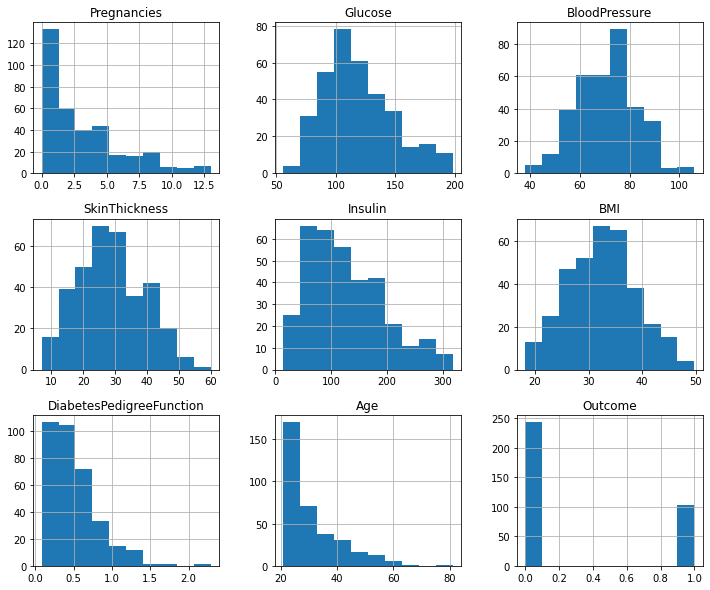

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
Insfilter.hist(figsize=(12, 10))

> **Note: if you have more questions and insights don't hesitate to do it**

<a id='pre'></a>
## Build a Prediction Model


In [ ]:
# Make a feature scaling
'''
Filtered_data = []
Filtered_data.append(Insfilter['Age'].to_numpy())
Filtered_data.append(Insfilter['BloodPressure'].to_numpy())
Filtered_data.append(Insfilter['BMI'].to_numpy())
Filtered_data.append(Insfilter['DiabetesPedigreeFunction'].to_numpy())
Filtered_data.append(Insfilter['Glucose'].to_numpy())
Filtered_data.append(Insfilter['Insulin'].to_numpy())
Filtered_data.append(Insfilter['SkinThickness'].to_numpy())
Filtered_data.append(Insfilter['Pregnancies'].to_numpy())
Filtered_data.append(Insfilter['Outcome'].to_numpy())
'''


"\nFiltered_data = []\nFiltered_data.append(Insfilter['Age'].to_numpy())\nFiltered_data.append(Insfilter['BloodPressure'].to_numpy())\nFiltered_data.append(Insfilter['BMI'].to_numpy())\nFiltered_data.append(Insfilter['DiabetesPedigreeFunction'].to_numpy())\nFiltered_data.append(Insfilter['Glucose'].to_numpy())\nFiltered_data.append(Insfilter['Insulin'].to_numpy())\nFiltered_data.append(Insfilter['SkinThickness'].to_numpy())\nFiltered_data.append(Insfilter['Pregnancies'].to_numpy())\nFiltered_data.append(Insfilter['Outcome'].to_numpy())\n"

In [ ]:
# Split the data into train and test data
from sklearn.model_selection import train_test_split

training_data, testing_data = train_test_split(Insfilter, test_size=0.2, random_state=25)
labels_training = training_data.to_numpy()[:,8]
labels_testing = testing_data.to_numpy()[:,8]
Train_data = training_data.to_numpy()[:,:8]
Test_data = testing_data.to_numpy()[:,:8]
print(labels_training.shape, labels_testing.shape)

(277,) (70,)


## Compare the performance (Confusion matrix and classification report) of different classifiers (LR, KNN, SVM, DT and RF)

> **Note: use grid search with a suitable range of values to adjust the hyperparameters of DT and SVM and for loop to adjust the k value of KNN**

## **KNN**

In [ ]:
def Eigen_Generator (training_Data):
  Covariance_matrix=np.cov(training_Data,rowvar=False)
  Eigen_val, Eigen_vector=LA.eigh(Covariance_matrix)
  Eigen_val =Eigen_val [::-1]
  Eigen_vector = Eigen_vector [::-1]
  return Eigen_val,Eigen_vector

Eigen_val, Eigen_vector = Eigen_Generator(Train_data)
total_Eigen_vals = np.sum(abs(Eigen_val))

def Projecting_Data(alpha,Eigen_val,Eigen_vector,Training_set_Data,Test_set_Data):
  U_matrix=[]
  sum=0
  counter=1
  for i in range (len(Eigen_val)):
    sum=sum+Eigen_val[i]
    fr = sum/total_Eigen_vals
    if fr < alpha:
      counter = counter + 1
    else:
      break
  print("Reduced Dimensions:",counter)
  for i in range(counter):
    U_matrix.append(Eigen_vector[i])
  prj_train = np.dot(Training_set_Data,np.array(U_matrix).transpose())
  prj_test  = np.dot(Test_set_Data,np.array(U_matrix).transpose())
  return prj_train,prj_test

def Knn_Classifier_model(k,prj_train,Training_set_labels,prj_test,Test_set_labels,alpha):
  model = KNeighborsClassifier(n_neighbors=k)
  FitModel = model.fit(prj_train, Training_set_labels)
  predictions = model.predict(prj_test)
  accuracy = accuracy_score(Test_set_labels, predictions)
  print("For alpha =",alpha, "and k =",k, "Accuracy =",accuracy*100)
  return accuracy

prj_train_95 ,prj_test_95= Projecting_Data(0.95,Eigen_val,Eigen_vector,Train_data,Test_data)

Accuracy_95_50_50=[]

Accuracy_95_50_50.append(Knn_Classifier_model(1,prj_train_95,labels_training,prj_test_95,labels_testing,0.95))
Accuracy_95_50_50.append(Knn_Classifier_model(2,prj_train_95,labels_training,prj_test_95,labels_testing,0.95))
Accuracy_95_50_50.append(Knn_Classifier_model(3,prj_train_95,labels_training,prj_test_95,labels_testing,0.95))
Accuracy_95_50_50.append(Knn_Classifier_model(4,prj_train_95,labels_training,prj_test_95,labels_testing,0.95))
Accuracy_95_50_50.append(Knn_Classifier_model(5,prj_train_95,labels_training,prj_test_95,labels_testing,0.95))
Accuracy_95_50_50.append(Knn_Classifier_model(6,prj_train_95,labels_training,prj_test_95,labels_testing,0.95))
Accuracy_95_50_50.append(Knn_Classifier_model(7,prj_train_95,labels_training,prj_test_95,labels_testing,0.95))

Reduced Dimensions: 3
For alpha = 0.95 and k = 1 Accuracy = 65.71428571428571
For alpha = 0.95 and k = 2 Accuracy = 72.85714285714285
For alpha = 0.95 and k = 3 Accuracy = 74.28571428571429
For alpha = 0.95 and k = 4 Accuracy = 72.85714285714285
For alpha = 0.95 and k = 5 Accuracy = 74.28571428571429
For alpha = 0.95 and k = 6 Accuracy = 77.14285714285715
For alpha = 0.95 and k = 7 Accuracy = 74.28571428571429


### **DT**

In [ ]:
 from sklearn import decomposition, datasets
 from sklearn import tree
 from sklearn.pipeline import Pipeline
 from sklearn.model_selection import GridSearchCV
 from sklearn.preprocessing import StandardScaler

dataset = datasets.load_wine()
X = Train_data
y = labels_training

std_slc = StandardScaler()
pca = decomposition.PCA()
dec_tree = tree.DecisionTreeClassifier()
pipe = Pipeline(steps=[('std_slc', std_slc),('pca', pca),('dec_tree', dec_tree)])
n_components = list(range(1,X.shape[1]+1,1))
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]
parameters = dict(pca__n_components=n_components, dec_tree__criterion=criterion, dec_tree__max_depth=max_depth)
clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X, y)
#print('Prediction  ' ,clf_GS.predict(Test_data))
predicted = clf_GS.predict(Test_data)
countT=0
countF=0
for i in range(len(Test_data)):
  if predicted[i] == labels_testing[i]:
    #print("True")
    countT+=1
  else:
    #print('False')
    countF+=1

print(countT/(countT+countF))

print('Best Criterion:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print(); print(clf_GS.best_estimator_.get_params()['dec_tree'])

0.8
Best Criterion: gini
Best max_depth: 2
Best Number Of Components: 4

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


### **SVM**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
  
cancer = load_breast_cancer()
  
# The data set is presented in a dictionary form:
print(cancer.keys())

df_feat = pd.DataFrame(cancer['data'],
                       columns = cancer['feature_names'])
  
# cancer column is our target
df_target = pd.DataFrame(cancer['target'], 
                     columns =['Cancer'])



X_train, X_test, y_train, y_test = train_test_split(
						df_feat, np.ravel(df_target),
				test_size = 0.30, random_state = 101)

X_train, X_test, y_train, y_test = Train_data , Test_data , labels_training,labels_testing

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

# print best parameter after tuning
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)


grid_predictions = grid.predict(X_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.679, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.679, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.691, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.691, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.691, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.786, total=   0.0s
[C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.873, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.764, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.679, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.679, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.691, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.691, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.691, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 25.5min finished


SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
              precision    recall  f1-score   support

         0.0       0.85      0.87      0.86        54
         1.0       0.53      0.50      0.52        16

    accuracy                           0.79        70
   macro avg       0.69      0.69      0.69        70
weighted avg       0.78      0.79      0.78        70



### **LR**

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
X = Train_data
y = labels_training
X1 = Test_data
y1 = labels_testing
clf = LogisticRegression(random_state=0).fit(X, y)
clf.predict(X[:2, :])
clf.predict_proba(X[:2, :])
clf.score(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7906137184115524

### **RF**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X = Train_data
y = labels_training
X1 = Test_data
y1 = labels_testing
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)
clf.predict(X1)
clf.score(X1,y1)

0.8142857142857143

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work send it and Congratulations!